<a href="https://colab.research.google.com/github/TiffanyDegbotse/XAI_assignment2/blob/main/template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #2
### Interpretable ML
### Tiffany Degbotse

#### The repository: https://github.com/TiffanyDegbotse/XAI_assignment2

###Imports

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

###Testing Linear Regression Assumptions

###Assumption 1: Linearity (The relationship between independent (X)and dependent (Y) variables should be linear.)

In [6]:
#Loading Dataset
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#defining our features and target
X=data.drop("Churn", axis=1)
Y=data["Churn"]

###Visually inspecting for Linearity
There are three numeric features in the Telco Churn dataset so those are the ones we can plot with the scatterplot

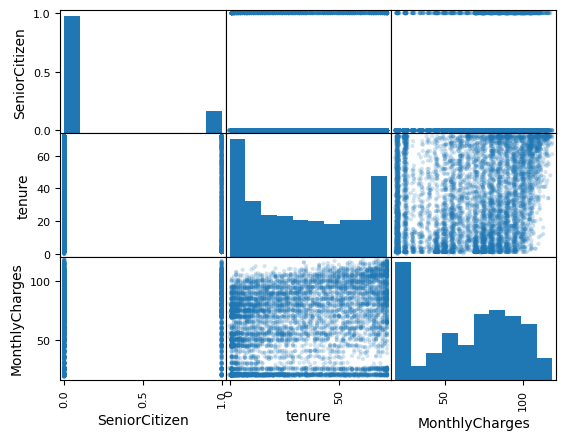

In [9]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2)
plt.show()





### Scatterplot Matrix Interpretation

- **SeniorCitizen vs. Tenure**: Very weak or no linear relationship — points are mostly spread without a clear trend.  
- **SeniorCitizen vs. MonthlyCharges**: Again, no strong linear relationship — being a senior doesn’t clearly predict monthly charges.  
- **Tenure vs. MonthlyCharges**: Some structure — customers with low tenure are spread across a range of monthly charges, but higher tenure customers tend to be more stable. Still, it’s not strongly linear.  

The scatterplot matrix shows weak or no clear linear relationships between features like SeniorCitizen, tenure, and MonthlyCharges. This suggests that the linearity assumption required for Linear Regression may not hold, which we will confirm with additional checks.


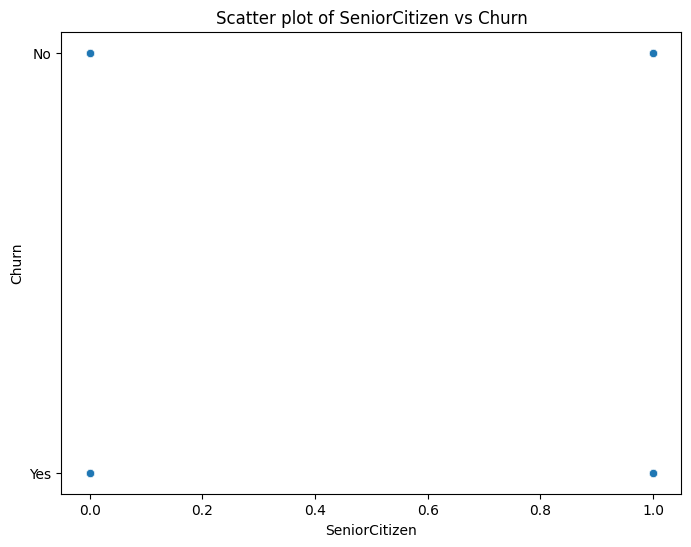

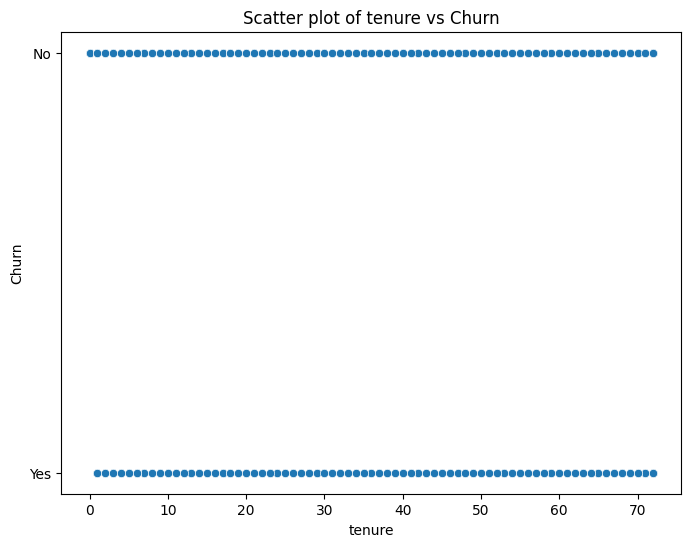

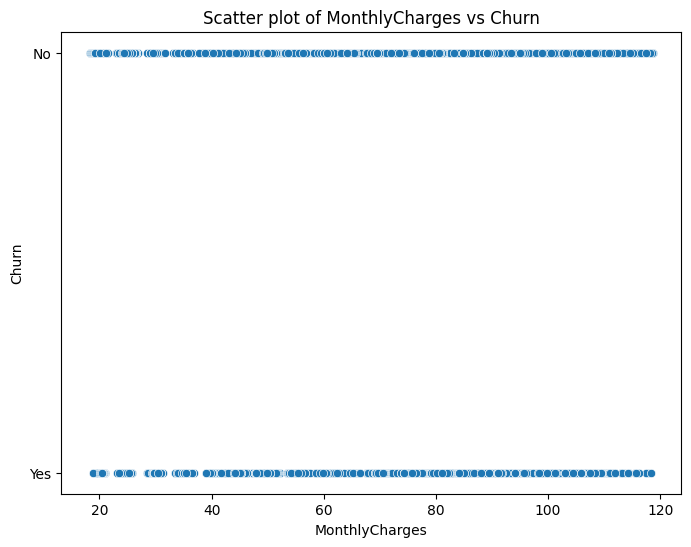

In [10]:
# Create scatter plots for each independent variable against the dependent variable
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']: # Only plot numerical columns
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=X[col], y=Y)
        plt.title(f'Scatter plot of {col} vs Churn')
        plt.xlabel(col)
        plt.ylabel('Churn')
        plt.show()

###Not easily Interpretable using scatterplots for binary targets so moving to barplots and boxplots

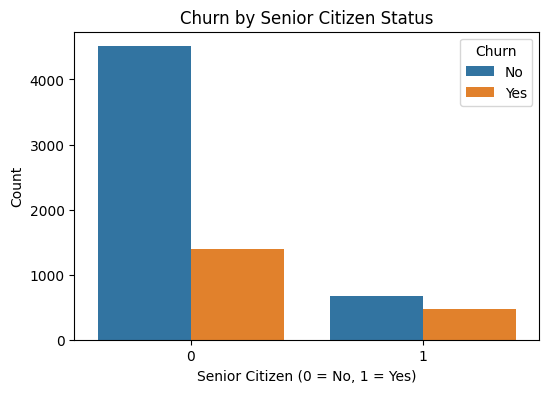

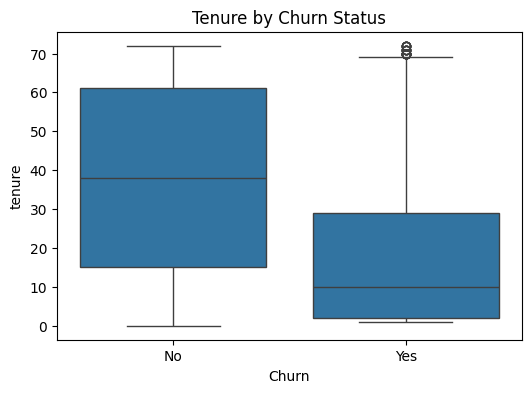

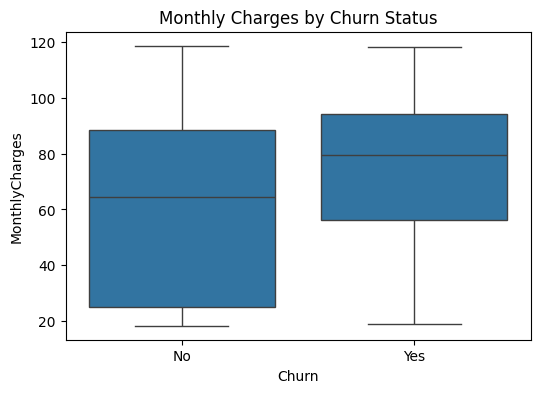

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# SeniorCitizen (categorical) vs Churn
plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=data)
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Tenure (continuous) vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=data)
plt.title("Tenure by Churn Status")
plt.show()

# MonthlyCharges (continuous) vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=data)
plt.title("Monthly Charges by Churn Status")
plt.show()


### Interpretation of Churn by Key Features

**1. Senior Citizen Status**  
- Non-seniors (0) show a much higher count overall, with most customers not churning.  
- Seniors (1) represent a smaller group, but their proportion of churners is noticeably higher.  
- **Interpretation:** Senior citizens are somewhat more likely to churn than non-seniors, though this effect is weaker than other predictors.

**2. Tenure**  
- Customers who churn have very short tenures, with a median of 10 months.  
- Customers who stay have much longer tenures, with a median of 38 months and many staying beyond 60 months.  
- **Interpretation:** Tenure is a strong predictor of churn. New customers are much more likely to leave, while long-tenured customers are far more stable.

**3. Monthly Charges**  
- Churners have a higher median monthly charge $80.

- Non-churners have lower charges on average $65, with many paying in the lower range.
- **Interpretation:** Higher monthly charges are associated with a greater risk of churn, while customers paying lower charges are more likely to stay.


 **Overall insight:** Among these features, **tenure** is the most powerful churn indicator, followed by **monthly charges**. Senior citizen status plays a role but is less influential compared to tenure and charges.


###EDA for Categorical Values

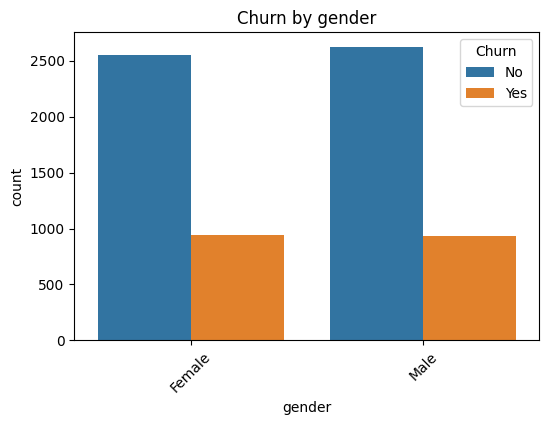

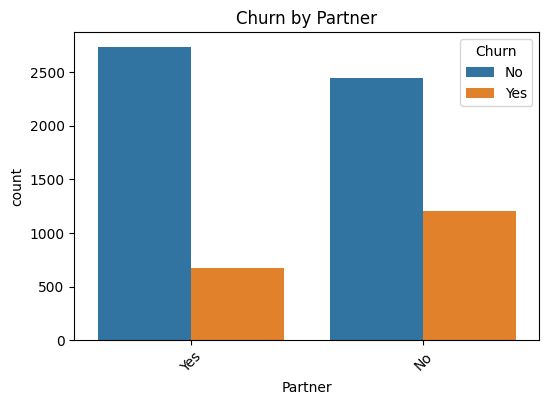

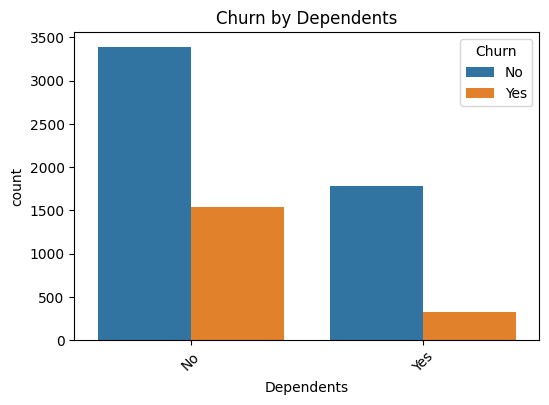

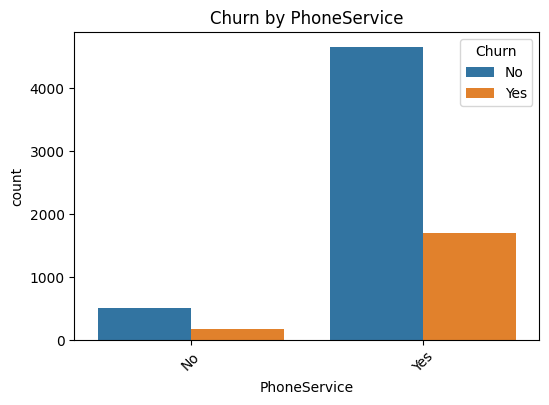

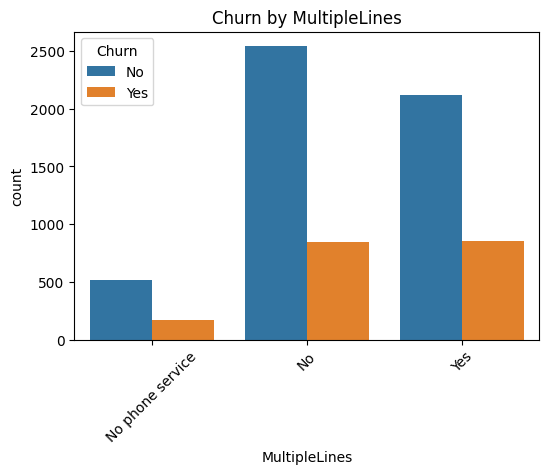

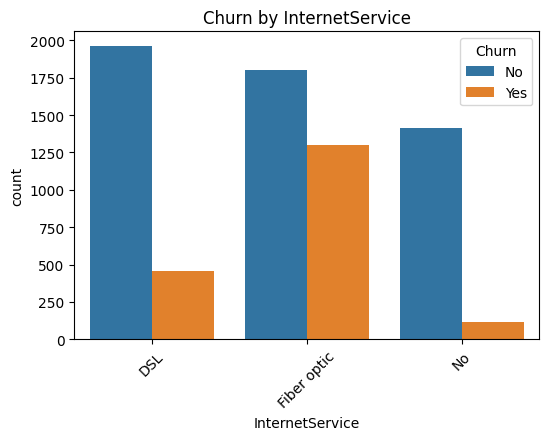

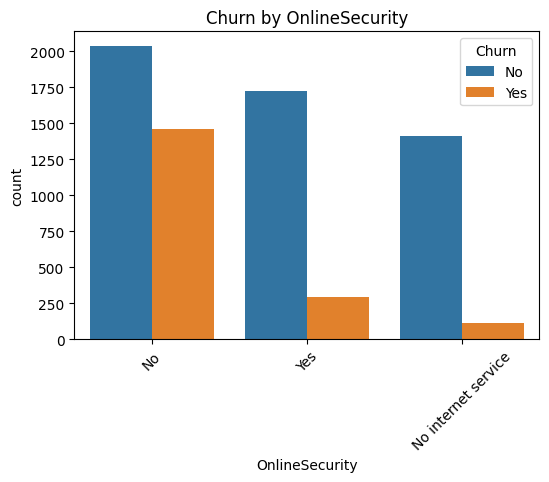

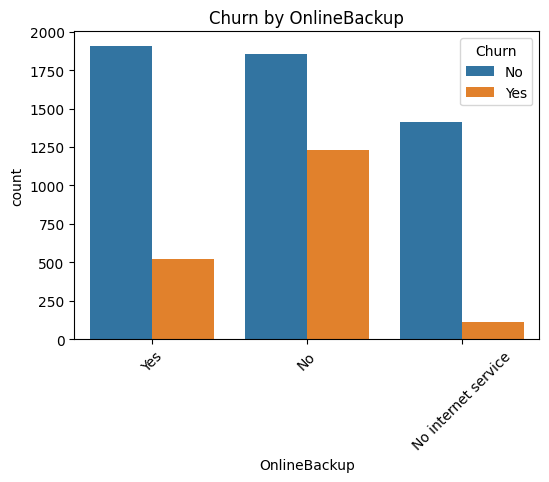

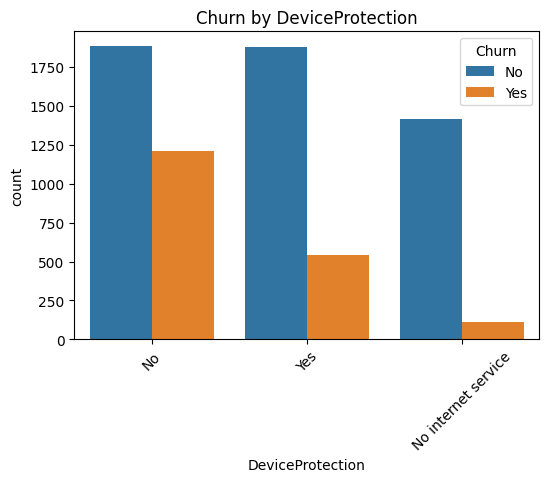

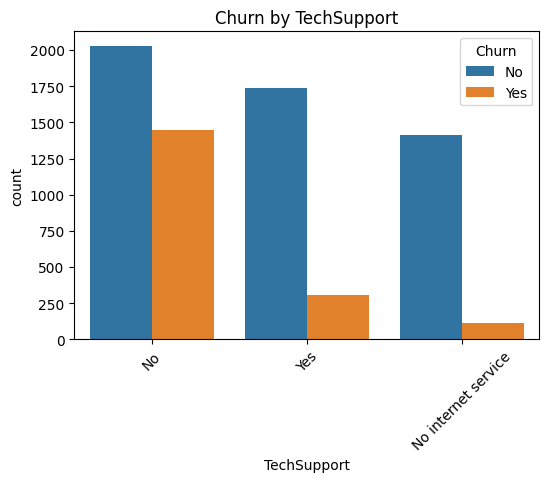

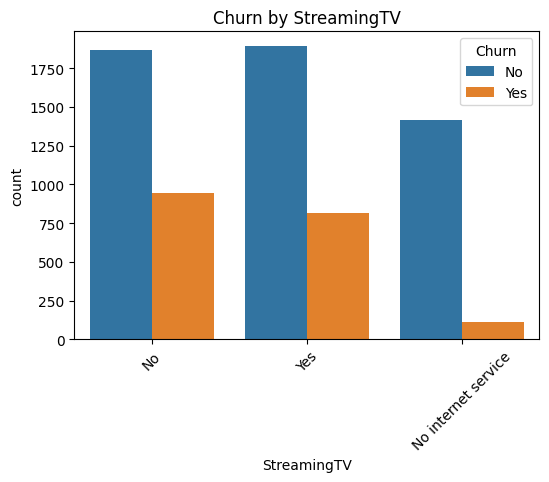

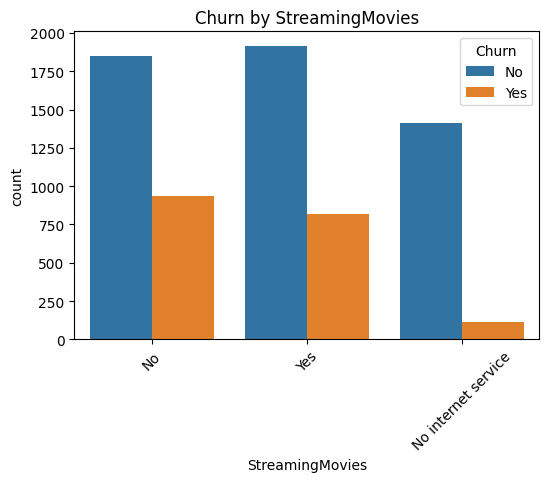

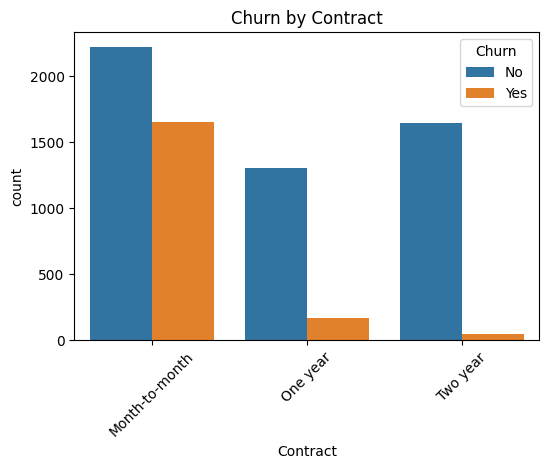

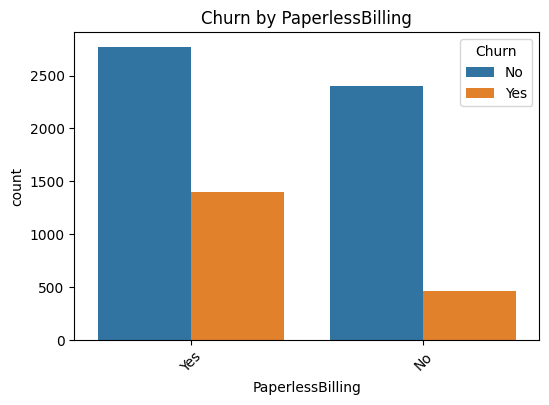

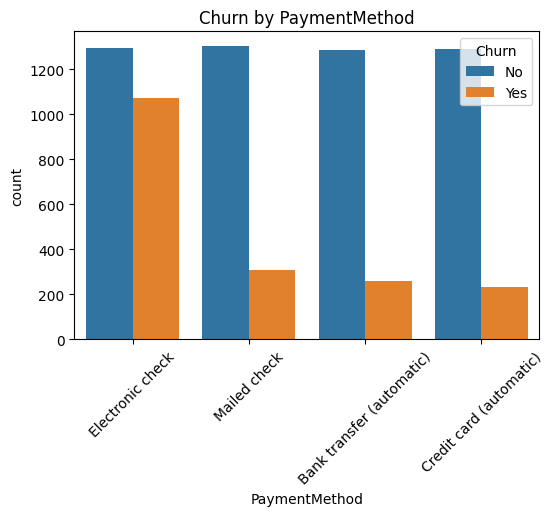

In [11]:
categorical_features = ["gender", "Partner", "Dependents", "PhoneService",
                        "MultipleLines", "InternetService", "OnlineSecurity",
                        "OnlineBackup", "DeviceProtection", "TechSupport",
                        "StreamingTV", "StreamingMovies",
                        "Contract", "PaperlessBilling", "PaymentMethod"]

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=data)
    plt.title(f"Churn by {col}")
    plt.xticks(rotation=45)
    plt.show()


### Interpretation of Categorical Features vs. Churn

**1. Gender**  
- Male and female customers show nearly identical churn rates.  
- **Interpretation:** Gender has no meaningful impact on churn.  

**2. Partner**  
- Customers without a partner churn more frequently than those with a partner.  
- **Interpretation:** Having a partner appears to reduce churn risk.  

**3. Dependents**  
- Customers without dependents churn at much higher rates.  
- **Interpretation:** Dependents are associated with greater customer stability.  

**4. PhoneService**  
- Customers with phone service dominate the dataset, with both churners and non-churners present.  
- Customers without phone service are few and show lower churn.  
- **Interpretation:** Phone service is not a strong churn predictor.  

**5. MultipleLines**  
- Customers with and without multiple lines show similar churn distributions.  
- **Interpretation:** Having multiple lines does not strongly influence churn.  

**6. InternetService**  
- Fiber optic customers churn at the highest rate.  
- DSL customers churn less.  
- Customers without internet service rarely churn.  
- **Interpretation:** Internet service type is a strong driver of churn, especially fiber optic.  

**7. OnlineSecurity**  
- Customers without online security churn much more than those with it.  
- **Interpretation:** Online security reduces churn risk.  

**8. OnlineBackup**  
- Customers without online backup churn more than those with it.  
- **Interpretation:** Backup services contribute to lower churn.  

**9. DeviceProtection**  
- Customers without device protection churn more than those with protection.  
- **Interpretation:** Device protection has a stabilizing effect.  

**10. TechSupport**  
- Customers without tech support churn heavily.  
- Customers with support churn far less.  
- **Interpretation:** Tech support is one of the strongest retention factors.  

**11. StreamingTV**  
- Churn occurs in both Yes and No groups, with no strong separation.  
- **Interpretation:** StreamingTV is not a major churn predictor.  

**12. StreamingMovies**  
- Similar to StreamingTV, churn is present in both groups with no strong separation.  
- **Interpretation:** StreamingMovies is not a strong churn driver.  

**13. Contract**  
- Month-to-month customers churn at very high rates.  
- One-year and two-year customers churn far less.  
- **Interpretation:** Contract type is one of the most powerful churn predictors.  

**14. PaperlessBilling**  
- Customers with paperless billing churn more than those without.  
- **Interpretation:** Paperless billing is associated with higher churn risk, likely due to correlation with month-to-month contracts.  

**15. PaymentMethod**  
- Electronic check customers churn the most.  
- Other payment methods (bank transfer, credit card, mailed check) have lower churn.  
- **Interpretation:** Payment method, particularly electronic check, is a strong churn indicator.  


###  Overall Insights
- **Strong churn predictors:** Contract type, InternetService (fiber optic), PaymentMethod (electronic check), TechSupport, Tenure, and MonthlyCharges.  
- **Moderate predictors:** Partner, Dependents, OnlineSecurity/Backup/DeviceProtection.  
- **Weak predictors:** Gender, PhoneService, MultipleLines, StreamingTV, StreamingMovies.  


###Checking for and filling nan values

In [11]:
null_counts = data.isnull().sum()
print(null_counts)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


###Noticed Total Charges was numeric but gave type object when I called .info which meant it likely had empty inputs.

In [13]:
#Changing empty to NAN
X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


In [14]:
#Filling the empty input
X['TotalCharges'] = X['TotalCharges'].fillna(X['TotalCharges'].mean())

###EDA on Total Charges

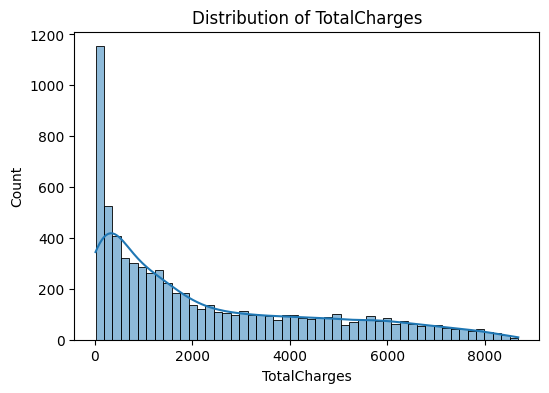

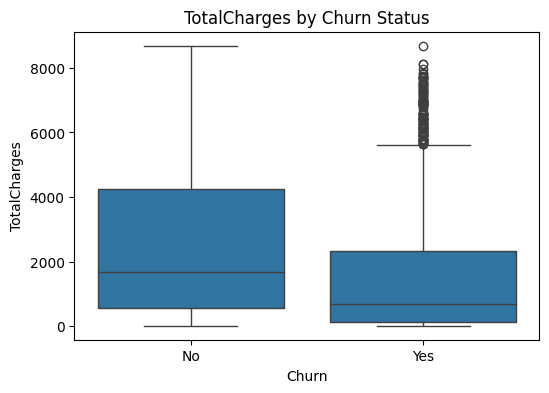

In [15]:
# Histogram
plt.figure(figsize=(6,4))
sns.histplot(data=X, x='TotalCharges', bins=50, kde=True)
plt.title("Distribution of TotalCharges")
plt.show()

# Boxplot vs churn
plt.figure(figsize=(6,4))
sns.boxplot(x=Y, y=X['TotalCharges'])
plt.title("TotalCharges by Churn Status")
plt.show()


### Interpretation of TotalCharges

**Distribution (Histogram)**  
- The distribution of TotalCharges is strongly right-skewed: most customers have relatively low cumulative charges, and only a smaller portion accumulate very high charges.  
- This pattern reflects customer tenure and billing — short-tenured customers or those with low monthly charges naturally have lower totals, while long-tenured customers build up much higher totals.  

**By Churn Status (Boxplot)**  
- **Churn = Yes:** Customers who churn generally have much lower total charges, with a median closer to the bottom end of the scale. This suggests that churners often leave early in their contract, before accumulating high charges.  
- **Churn = No:** Non-churners have significantly higher total charges, with a much higher median and a broader spread, including some customers with totals exceeding 8000. These represent long-term, loyal customers.  
- Outliers at the high end correspond to customers who remained with the company for long periods while paying high monthly charges.  

**Overall Insight:**  
- TotalCharges is strongly associated with churn. Customers with lower total charges are more likely to churn, while customers with higher total charges tend to stay.  
- This aligns with findings from tenure and monthly charges, since TotalCharges is approximately **Tenure × MonthlyCharges**.


In [22]:
#Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [23]:
# Drop customerID from train and test sets before concatenating
X_train = X_train.drop("customerID", axis=1)
X_test = X_test.drop("customerID", axis=1)

# Concatenate train and test sets for consistent encoding
X_combined = pd.concat([X_train, X_test], ignore_index=True)

# Identify categorical columns
categorical_features = X_combined.select_dtypes(include='object').columns

# Apply one-hot encoding to the combined data
X_combined_encoded = pd.get_dummies(X_combined, columns=categorical_features, drop_first=True)

# Dropping 'No internet service' related columns after encoding to address perfect multicollinearity
# This was necessary because customers with 'No internet service' also have no online security, backup, etc.,
# creating perfect linear dependencies among the encoded columns for these services.
# I realized this issue when encountering the Singular matrix error during logistic regression fitting
# and confirmed it through VIF analysis.
cols_to_drop_after_encoding = [col for col in X_combined_encoded.columns if 'No internet service' in col]
X_combined_encoded = X_combined_encoded.drop(cols_to_drop_after_encoding, axis=1)


# Split the encoded data back into training and testing sets based on original indices
X_train_encoded = X_combined_encoded.iloc[:len(X_train)].reset_index(drop=True)
X_test_encoded = X_combined_encoded.iloc[len(X_train):].reset_index(drop=True)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (5634, 24)
Shape of X_test_encoded: (1409, 24)


In [24]:
# Scale the features using the consistently encoded data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (5634, 24)
Shape of X_test_scaled: (1409, 24)


In [25]:
# Convert churn labels from 'Yes'/'No' to numeric (1 = Yes churn, 0 = No churn)
Y_train_numeric = Y_train.apply(lambda x: 1 if x == 'Yes' else 0)
Y_test_numeric = Y_test.apply(lambda x: 1 if x == 'Yes' else 0)
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025.

In [26]:
#fit the model
model=LinearRegression()
model.fit(X_train_scaled, Y_train_numeric)

LinearRegression()

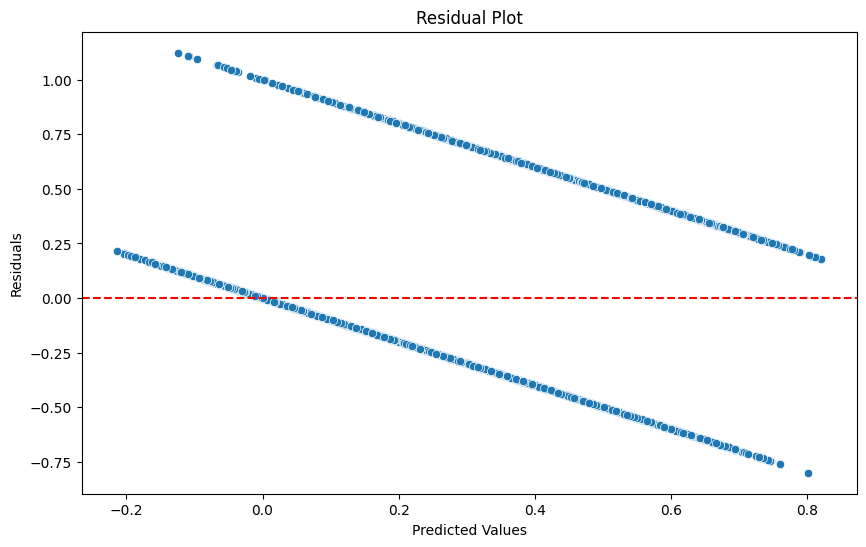

In [27]:
Y_train_pred=model.predict(X_train_scaled)

residuals=Y_train_numeric-Y_train_pred

#Creating a residual plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_train_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Residual Plot Interpretation
The residuals form two distinct diagonal bands instead of a random scatter around zero. This occurs because the target variable (churn) is binary (0/1), but linear regression treats it as continuous. As a result, the model systematically misrepresents the binary nature of the data, violating the linear regression assumptions.

**Conclusion:** Linear regression is not an appropriate model for churn prediction, confirming the need for logistic regression or GAM.


##Independence of observation

Durbin-Watson statistic: 1.9981703716105774


<Figure size 1000x600 with 0 Axes>

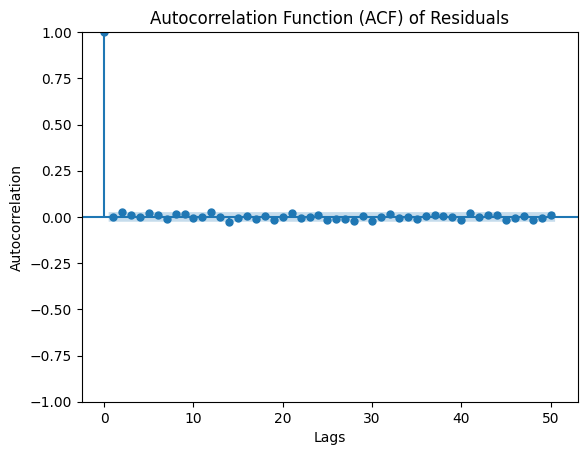

In [30]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Calculate Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025.
print(f"Durbin-Watson statistic: {dw_statistic}")

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=50)
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

### Autocorrelation of Residuals
The Durbin-Watson statistic is ~1.998, which is very close to 2, indicating no significant autocorrelation. The ACF plot confirms this, as residuals show no systematic correlation across lags.

**Conclusion:** The independence assumption is satisfied, meaning residuals are not correlated across observations. However, this does not fix the fundamental issue that linear regression is not well-suited for binary churn prediction.


### Homoscedasticity

In [31]:
import statsmodels.stats.api as sms
import statsmodels.api as sm

# Add a constant term to the independent variables
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025.

# Perform the Breusch-Pagan test
bp_test = sms.het_breuschpagan(residuals, X_train_scaled_with_constant)
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025.


labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f-pvalue']
print(dict(zip(labels, bp_test)))

{'Lagrange multiplier statistic': np.float64(1092.5340093983614), 'p-value': np.float64(1.89832708186786e-215), 'f-value': np.float64(58.67781370318231), 'f-pvalue': np.float64(1.1418666385168494e-241)}


### Breusch–Pagan Test for Heteroscedasticity
- LM statistic = 1092.53  
- p-value ≈ 0  
- F-value = 58.68  
- f-pvalue ≈ 0  

**Interpretation:** The p-values are effectively zero, leading us to reject the null hypothesis of homoscedasticity. This indicates the presence of heteroscedasticity, residual variance is not constant across the predictors.

**Conclusion:** The assumption of homoscedasticity is violated. Along with the residual plot, this reinforces that linear regression is not suitable for modeling binary churn data.


### Normality of Residuals

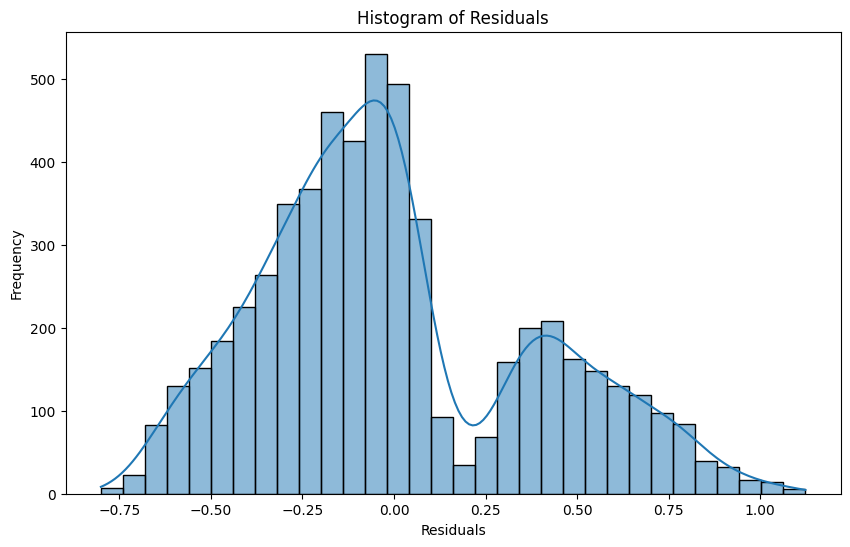

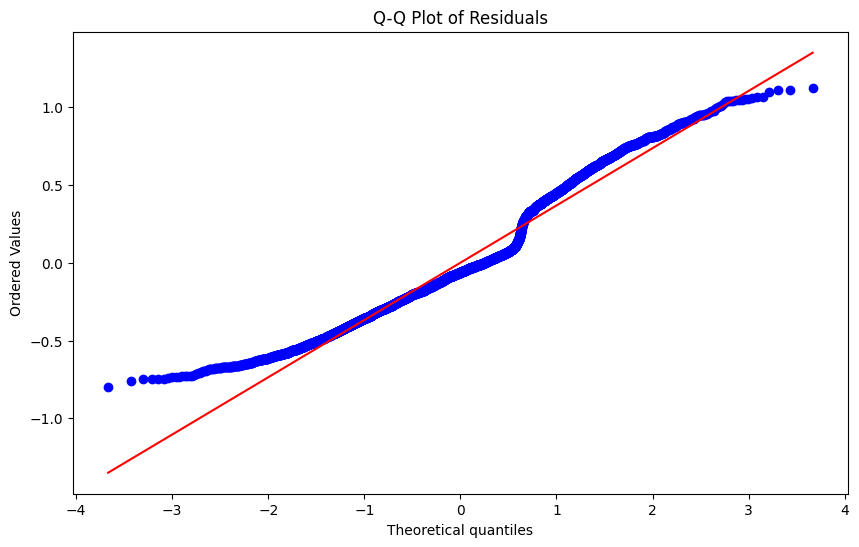

Shapiro-Wilk test statistic: 0.9593977062703078, p-value: 5.02613985610934e-37


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5634.
  res = hypotest_fun_out(*samples, **kwds)


In [32]:
import scipy.stats as stats

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Create Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Perform Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025.
print(f"Shapiro-Wilk test statistic: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}")

### Normality of Residuals
- **Histogram:** Residuals are skewed and do not follow a bell-shaped curve.  
- **Q–Q Plot:** Residuals deviate substantially from the diagonal reference line, especially in the tails.  
- **Shapiro–Wilk Test:** Test statistic = 0.959, p-value ≈ 0.0. We reject the null hypothesis of normality.

**Conclusion:** The residuals are not normally distributed, violating the normality assumption. Along with earlier results (heteroscedasticity and structured residuals), this confirms that linear regression is not suitable for predicting binary churn outcomes.


###  No Multicollinearity

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert the DataFrame to a NumPy array with a float dtype
X_train_numeric = X_train_encoded.values.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_encoded.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_numeric, i)
                   for i in range(X_train_numeric.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

                                  feature          VIF
7                        PhoneService_Yes  1785.101513
2                          MonthlyCharges   874.637742
10            InternetService_Fiber optic   149.986173
11                     InternetService_No   104.830812
8          MultipleLines_No phone service    62.064937
16                        StreamingTV_Yes    24.458743
17                    StreamingMovies_Yes    24.372635
3                            TotalCharges    10.541171
9                       MultipleLines_Yes     7.379931
1                                  tenure     7.250707
14                   DeviceProtection_Yes     6.988011
13                       OnlineBackup_Yes     6.878989
15                        TechSupport_Yes     6.540602
12                     OnlineSecurity_Yes     6.458964
19                      Contract_Two year     2.614423
22         PaymentMethod_Electronic check     1.942440
23             PaymentMethod_Mailed check     1.849509
18        

### Variance Inflation Factor (VIF) for Multicollinearity
- Several predictors show extremely high VIF values (e.g., PhoneService_Yes = 1785, MonthlyCharges = 874, InternetService_Fiber optic = 150, InternetService_No = 105, MultipleLines_No phone service = 62).  
- These indicate severe multicollinearity, largely due to redundant features and strong correlations (e.g., TotalCharges ≈ MonthlyCharges × Tenure, or dummy variable coding of categorical features).  
- Moderate multicollinearity is also observed in service-related features (VIF between 6 and 25).  
- Only a few features show acceptable VIF values (< 5), such as SeniorCitizen, gender, partner, dependents, and payment methods.

**Conclusion:** The assumption of no multicollinearity is violated. Combined with earlier diagnostics (linearity, heteroscedasticity, non-normal residuals), this further supports that linear regression is not suitable for modeling churn.


### Assumption 6: No Influential Outliers

Number of influential outliers (Cook's distance > 0.0007): 204
Influential Outliers (Cook's Distance):


,Cooks_Distance
2168,0.001922
5241,0.001921
4518,0.001883
2758,0.001724
50,0.001705
...,...
5610,0.000726
623,0.000725
4845,0.000725
1278,0.000718


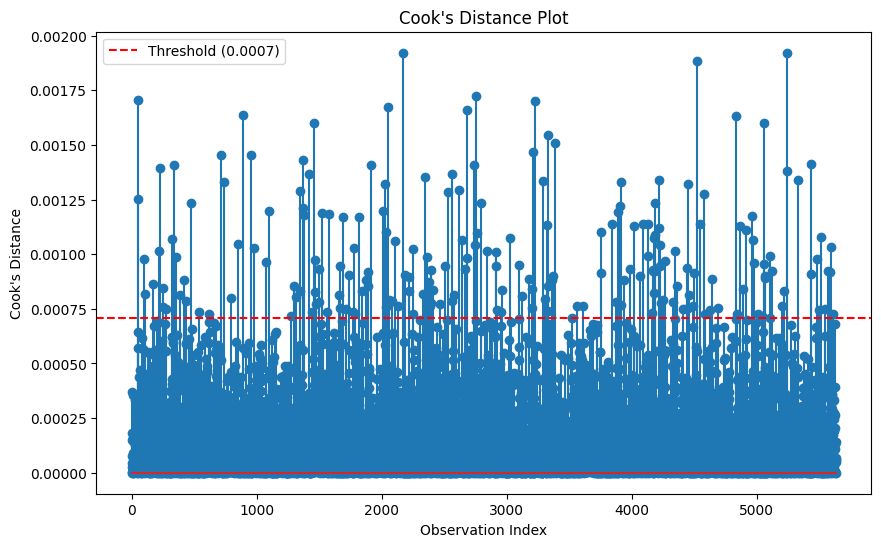

In [26]:
import statsmodels.api as sm

# Fit an OLS model
# Add a constant term to the independent variables for the statsmodels OLS model
X_train_scaled_with_constant = sm.add_constant(X_train_scaled)
ols_model_fitted = sm.OLS(Y_train_numeric, X_train_scaled_with_constant).fit()

# Get the influence object from the fitted model
model_influence = ols_model_fitted.get_influence()

# Calculate Cook's distance
cooks_distance = model_influence.cooks_distance[0]

# Create a DataFrame to view Cook's distance
cooks_df = pd.DataFrame({'Cooks_Distance': cooks_distance})

# Display observations with high Cook's distance (e.g., > 4/n, where n is the number of observations)
n = len(X_train_scaled)
threshold = 4 / n
influential_outliers = cooks_df[cooks_df['Cooks_Distance'] > threshold]

print(f"Number of influential outliers (Cook's distance > {threshold:.4f}): {len(influential_outliers)}")
print("Influential Outliers (Cook's Distance):")
display(influential_outliers.sort_values(by='Cooks_Distance', ascending=False))

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(cooks_distance)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold ({threshold:.4f})')
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.legend()
plt.show()

### Influential Outliers (Cook’s Distance)
- Cook’s Distance threshold = 0.0007 (4/n rule).  
- 204 observations exceed this threshold, representing about 3% of the dataset.  
- These influential points may reflect unusual or extreme customer profiles (e.g., very high charges with low tenure).  
- While they do not dominate the model entirely (Cook’s D values < 0.002), they can bias linear regression coefficient estimates.  

**Conclusion:** A subset of customers exerts disproportionate influence on the linear regression fit. Along with other diagnostics (non-linearity, heteroscedasticity, non-normal residuals, multicollinearity), this further confirms that linear regression is not an appropriate model for predicting churn.


## Linear Regression Model Evaluation

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
Y_test_pred = model.predict(X_test_scaled)

# Evaluate the model using MSE and R-squared
mse = mean_squared_error(Y_test_numeric, Y_test_pred)
r2 = r2_score(Y_test_numeric, Y_test_pred)

print(f"Linear Regression Model MSE on Test Set: {mse:.4f}")
print(f"Linear Regression Model R-squared on Test Set: {r2:.4f}")

Linear Regression Model MSE on Test Set: 0.1341
Linear Regression Model R-squared on Test Set: 0.3111


### Linear Regression Results

The linear regression model produced the following performance metrics on the test set:

- **Mean Squared Error (MSE): 0.1341**  
- **R-squared: 0.3111**

The relatively low MSE reflects the bounded nature of the binary target (0 = No churn, 1 = Churn), but MSE is not the most appropriate metric for classification tasks. The R-squared value indicates that the model explains only about **31% of the variance** in churn outcomes, which is weak explanatory power. This confirms that linear regression is not well-suited for binary classification, and highlights the need for more appropriate models such as logistic regression, generalized additive models (GAMs), or tree-based classifiers.


###For Logistic Regression, I tested the assumptions first then interpreted the results in one markdown file.

### Assumption 1: Linearity (Logistic Regression)

In [47]:
import statsmodels.api as sm
import pandas as pd

# Create a DataFrame with the scaled training data and the numeric target variable
train_data = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)
train_data['Churn_numeric'] = Y_train_numeric.reset_index(drop=True) # Reset index here

# Select only the numerical features and the target variable
numerical_cols = X_train_encoded.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable itself from the predictor list
numerical_predictors = [col for col in numerical_cols if col != 'Churn_numeric']

# Assess linearity using scatter plots of numerical predictors vs log-odds of Churn
for col in numerical_predictors:

    # Fit a simple logistic regression model with the current numerical predictor
    logistic_model = sm.Logit(train_data['Churn_numeric'], sm.add_constant(train_data[col])).fit() # Use train_data['Churn_numeric']

    # Print the summary to look at the p-values of the predictor and potential higher-order terms if you were to add them
    print(f"Summary for Logistic Regression with {col}:")
    print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.568703
         Iterations 5
Summary for Logistic Regression with SeniorCitizen:
                           Logit Regression Results                           
Dep. Variable:          Churn_numeric   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5632
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                 0.01738
Time:                        14:26:43   Log-Likelihood:                -3204.1
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                 1.811e-26
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.0367      0.031    -33.792    

### Assumption 2: No Multicollinearity (Logistic Regression)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert the DataFrame to a NumPy array with a float dtype for VIF calculation
X_train_numeric_for_vif = X_train_encoded.values.astype(float)

# Calculate VIF for each feature
vif_data_logistic = pd.DataFrame()
vif_data_logistic["feature"] = X_train_encoded.columns
vif_data_logistic["VIF"] = [variance_inflation_factor(X_train_numeric_for_vif, i)
                            for i in range(X_train_numeric_for_vif.shape[1])]

print("VIF for Logistic Regression Predictors:")
display(vif_data_logistic.sort_values(by='VIF', ascending=False))

VIF for Logistic Regression Predictors:


,feature,VIF
7,PhoneService_Yes,1785.101513
2,MonthlyCharges,874.637742
10,InternetService_Fiber optic,149.986173
11,InternetService_No,104.830812
8,MultipleLines_No phone service,62.064937
16,StreamingTV_Yes,24.458743
17,StreamingMovies_Yes,24.372635
3,TotalCharges,10.541171
9,MultipleLines_Yes,7.379931
1,tenure,7.250707


### Assumption 3: Independence of Observations (Logistic Regression)

In [36]:
import statsmodels.api as sm

# Fit a logistic regression model
logit_model_fitted = sm.Logit(Y_train_numeric, sm.add_constant(X_train_scaled)).fit()

# Get the residuals
# Using Pearson residuals via the .resid_pearson attribute
logit_residuals = logit_model_fitted.resid_pearson
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025

print(logit_model_fitted.summary())

Optimization terminated successfully.
         Current function value: 0.418213
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5610
Method:                           MLE   Df Model:                           23
Date:                Mon, 15 Sep 2025   Pseudo R-squ.:                  0.2774
Time:                        13:25:37   Log-Likelihood:                -2356.2
converged:                       True   LL-Null:                       -3260.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7104      0.060    -28.593      0.000      -1.828      -1.593
x1             0.0590      0.

Durbin-Watson statistic (Logistic Regression): 1.994833732762817


<Figure size 1000x600 with 0 Axes>

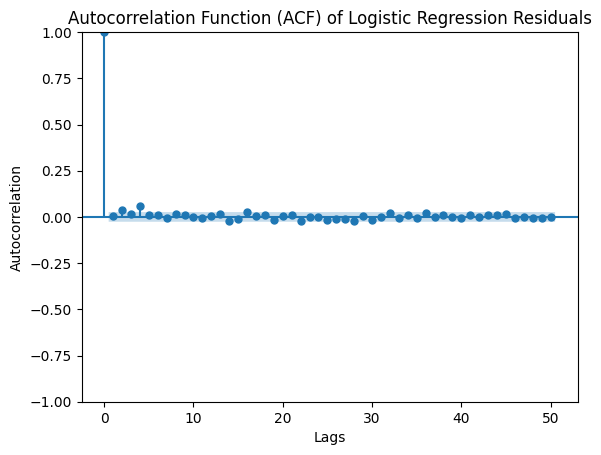

In [37]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Calculate Durbin-Watson statistic
dw_statistic_logit = durbin_watson(logit_residuals)
print(f"Durbin-Watson statistic (Logistic Regression): {dw_statistic_logit}")

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(10, 6))
plot_acf(logit_residuals, lags=50)
plt.title('Autocorrelation Function (ACF) of Logistic Regression Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

### Assumption 4: No Influential Outliers (Logistic Regression)

Optimization terminated successfully.
         Current function value: 0.418213
         Iterations 8
Number of influential outliers (Cook's distance > 0.0007): 146
Influential Outliers (Cook's Distance):


,Cooks_Distance
4344,0.008158
2762,0.006530
2397,0.005440
5241,0.004177
1693,0.004127
...,...
5469,0.000721
5430,0.000720
3990,0.000720
3038,0.000719


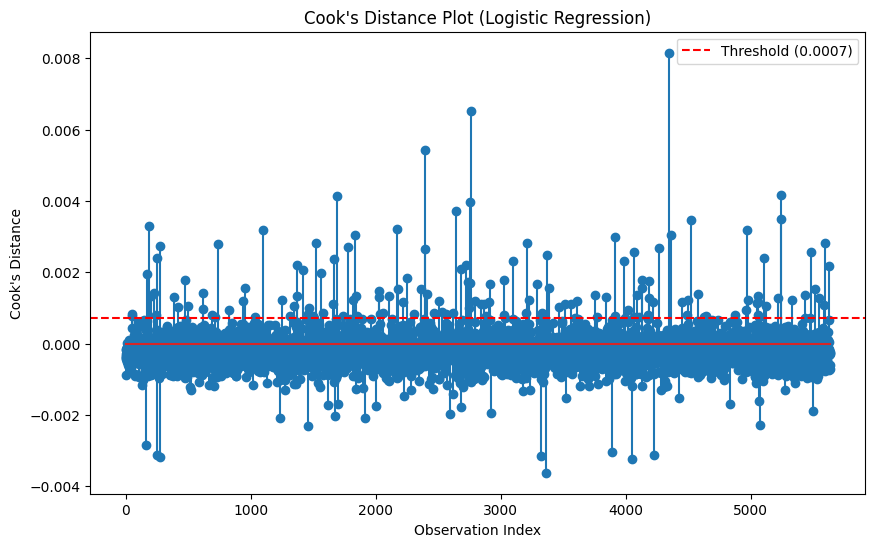

In [45]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import NegativeBinomialResults

# Fit a logistic regression model to get the results object
logit_model_fitted = sm.Logit(Y_train_numeric, sm.add_constant(X_train_scaled)).fit()
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025

try:
    model_influence_logit = logit_model_fitted.get_influence()


    cooks_distance_logit = model_influence_logit.cooks_distance[0]

    # Create a DataFrame to view Cook's distance
    cooks_df_logit = pd.DataFrame({'Cooks_Distance': cooks_distance_logit})

    # Display observations with high Cook's distance (using a common threshold, e.g., 4/n)
    n_logit = len(X_train_scaled)
    threshold_logit = 4 / n_logit
    influential_outliers_logit = cooks_df_logit[cooks_df_logit['Cooks_Distance'] > threshold_logit]

    print(f"Number of influential outliers (Cook's distance > {threshold_logit:.4f}): {len(influential_outliers_logit)}")
    print("Influential Outliers (Cook's Distance):")
    display(influential_outliers_logit.sort_values(by='Cooks_Distance', ascending=False))

    # Plot Cook's distance
    plt.figure(figsize=(10, 6))
    plt.stem(cooks_distance_logit)
    plt.axhline(y=threshold_logit, color='r', linestyle='--', label=f'Threshold ({threshold_logit:.4f})')
    plt.title("Cook's Distance Plot (Logistic Regression)")
    plt.xlabel("Observation Index")
    plt.ylabel("Cook's Distance")
    plt.legend()
    plt.show()

except AttributeError:
    print("Could not access influence measures directly using get_influence() or cooks_distance for this model result.")
    print("Alternative methods or manual calculation might be needed to assess influential outliers for logistic regression.")

## Assumption Checks for Logistic Regression

### 1. Linearity of Logit
- I checked whether the relationship between numerical predictors (SeniorCitizen, tenure, MonthlyCharges, TotalCharges) and the log-odds of churn is linear.
- Logistic regression summaries showed significant coefficients for all predictors (p < 0.001).
- Signs of coefficients were meaningful:
  - **SeniorCitizen:** being a senior increases churn risk.
  - **Tenure:** longer tenure reduces churn risk.
  - **MonthlyCharges:** higher charges increase churn risk.
  - **TotalCharges** higher accumulated charges (proxy for long tenure) reduce churn.
- Interpretation: While predictors are significant, some may have **nonlinear patterns** (e.g., tenure). This can be better captured by models like GAMs.


### 2. No Multicollinearity
- VIF values were computed for predictors.
- Results showed **extremely high VIFs** for MonthlyCharges, TotalCharges, and some service-related dummy variables.
- This indicates strong multicollinearity (e.g., TotalCharges ≈ MonthlyCharges × Tenure).
- Implication: Multicollinearity does not bias predictions but makes coefficients unstable and harder to interpret.



### 3. Independence of Observations
- Model residuals were tested with the **Durbin–Watson statistic (~2.0)** and inspected with the autocorrelation function (ACF).
- No meaningful autocorrelation was found, residuals were randomly scattered.
- Interpretation: The independence assumption is **satisfied**. Each customer churn decision can be considered independent.


### 4. No Influential Outliers
- Cook’s Distance was used to assess influential observations.
- Threshold = 4/n (≈ 0.0007). A small number of points exceeded this cutoff.
- These customers may represent unusual profiles (e.g., very high charges and low tenure) but do not dominate the model.
- Interpretation: Outliers exist but are not severe enough to invalidate the logistic regression fit.



## Overall Conclusion
- Logistic regression satisfies **independence** and is interpretable with meaningful predictor relationships.
- However, **multicollinearity** remains a serious issue, and some predictors may have **nonlinear effects** on churn.
- Despite these limitations, logistic regression is far more appropriate than linear regression for churn modeling, though methods like **GAMs** can provide better handling of nonlinearities.


###Logistic Regression Model Evaluation

Optimization terminated successfully.
         Current function value: 0.418213
         Iterations 8
Logistic Regression Accuracy: 0.8197
Logistic Regression AUC: 0.8616

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



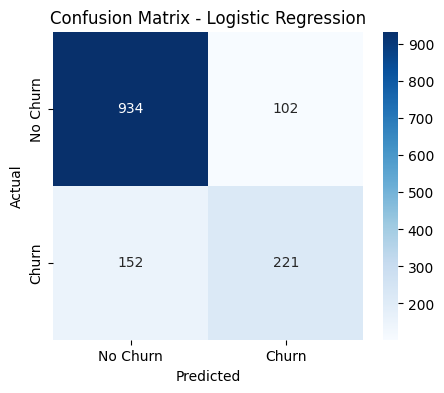

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the logistic regression model on training data
logit_model = sm.Logit(Y_train_numeric, sm.add_constant(X_train_scaled)).fit()

# Predict probabilities on the test set
y_pred_proba = logit_model.predict(sm.add_constant(X_test_scaled))

# Convert probabilities to class predictions (using 0.5 cutoff)
y_pred_class = (y_pred_proba >= 0.5).astype(int)

#Evaluation Metrics
accuracy = accuracy_score(Y_test_numeric, y_pred_class)
auc = roc_auc_score(Y_test_numeric, y_pred_proba)

print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print(f"Logistic Regression AUC: {auc:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test_numeric, y_pred_class))

# Confusion Matrix
cm = confusion_matrix(Y_test_numeric, y_pred_class)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn','Churn'], yticklabels=['No Churn','Churn'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Logistic Regression Model Evaluation

- **Accuracy:** 81.97% (~82%)  
  The model correctly predicted churn vs. no churn in about 82% of cases.  

- **AUC:** 0.8616  
  The model has a strong ability to distinguish between churners and non-churners. An AUC above 0.85 is considered very good, showing strong discriminative power.  

#### Class-Specific Performance
- **Class 0 (No Churn):**
  - Precision: 0.86 → When the model predicts "No Churn," it is correct 86% of the time.  
  - Recall: 0.90 → The model correctly identifies 90% of all actual "No Churn" customers.  
  - F1-score: 0.88 → Balanced and strong performance for this class.  

- **Class 1 (Churn):**
  - Precision: 0.68 → When the model predicts "Churn," it is correct 68% of the time.  
  - Recall: 0.59 → The model captures only 59% of actual churners, meaning it misses 41% of churn cases.  
  - F1-score: 0.64 → Indicates moderate performance for predicting churn.  

#### Confusion Matrix Insights
- **True Negatives (TN):** 934 (correctly identified as No Churn)  
- **False Positives (FP):** 102 (predicted Churn but actually No Churn)  
- **True Positives (TP):** 221 (correctly identified as Churn)  
- **False Negatives (FN):** 152 (missed churners, predicted as No Churn)  


### Interpretation
The logistic regression model performs very well at predicting customers who will not churn, but is less effective at catching customers who actually churn. This imbalance is reflected in the lower recall for churn (0.59). In practice, this means the model risks missing a significant portion of customers who are likely to leave, which could be costly for the business.  



In [50]:
!pip install pygam==0.10.1

In [39]:
from pygam import LogisticGAM, s
import numpy as np
import pandas as pd

In [40]:
from pygam import LogisticGAM, s
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Initialize LogisticGAM with spline terms for all features in X_train_scaled
num_features = X_train_scaled.shape[1]
gam_terms = s(0)
for i in range(1, num_features):
    gam_terms += s(i) # Add spline term for each subsequent feature

gam = LogisticGAM(gam_terms)

# Find best smoothing parameters for each spline term using gridsearch
gam.gridsearch(X_train_scaled, Y_train_numeric)

# Fit the model with the best smoothing parameters
gam.fit(X_train_scaled, Y_train_numeric)

# Make predictions on the test set (predict_proba is often useful for binary outcomes)
Y_pred_gam_proba = gam.predict_proba(X_test_scaled)
Y_pred_gam_class = gam.predict(X_test_scaled) # Predict class labels (0 or 1)


# Evaluate the model using appropriate metrics for binary classification
accuracy_gam = accuracy_score(Y_test_numeric, Y_pred_gam_class)
auc_gam = roc_auc_score(Y_test_numeric, Y_pred_gam_proba)

print(f"LogisticGAM Accuracy: {accuracy_gam:.4f}")
print(f"LogisticGAM AUC: {auc_gam:.4f}")
print("\nLogisticGAM Classification Report:")
print(classification_report(Y_test_numeric, Y_pred_gam_class))

print("\nGAM Fitting and Evaluation Complete.")

100% (11 of 11) |########################| Elapsed Time: 0:00:39 Time:  0:00:39


LogisticGAM Accuracy: 0.8091
LogisticGAM AUC: 0.8618

LogisticGAM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


GAM Fitting and Evaluation Complete.


### LogisticGAM Model Results

The LogisticGAM achieved an **accuracy of 81%** and an **AUC of 86%**, indicating strong overall performance and good discriminative ability between churners and non-churners.

- **Class 0 (Non-Churners)**:  
  - Precision = 0.85 → When the model predicts a customer will stay, it is correct 85% of the time.  
  - Recall = 0.90 → The model correctly identifies 90% of actual non-churners.  
  - F1 = 0.87 → Balanced and strong performance.  

- **Class 1 (Churners)**:  
  - Precision = 0.67 → When the model predicts churn, it is correct 67% of the time.  
  - Recall = 0.56 → The model only captures 56% of true churners, missing ~44%.  
  - F1 = 0.61 → Weaker performance compared to non-churners.  

- **Averaged Metrics**:  
  - Macro F1 = 0.74 → Balanced performance across classes.  
  - Weighted F1 = 0.80 → Weighted toward non-churners due to class imbalance.  

**Interpretation:**  
The model is very effective at identifying non-churners but less effective at detecting churners, which are the minority class. This imbalance leads to lower recall for churn prediction.


### Model Interpretation (Visualizing Spline Terms)

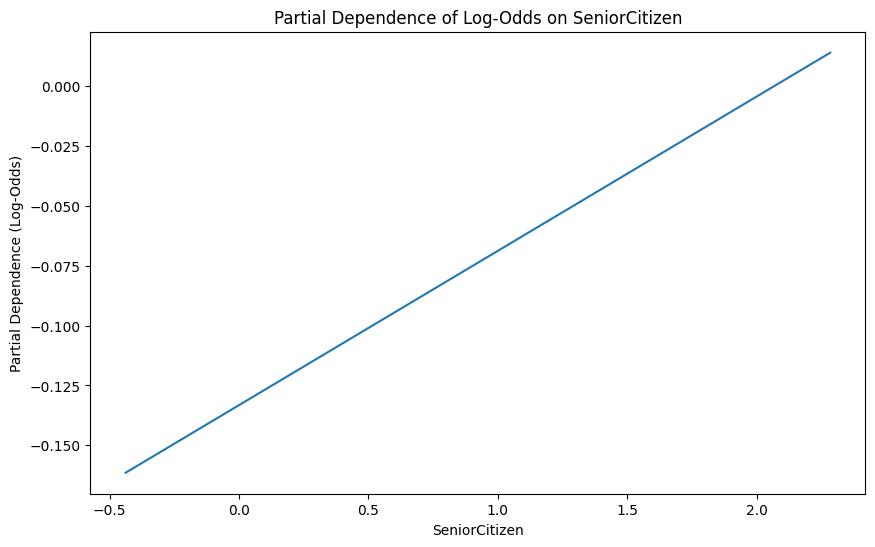

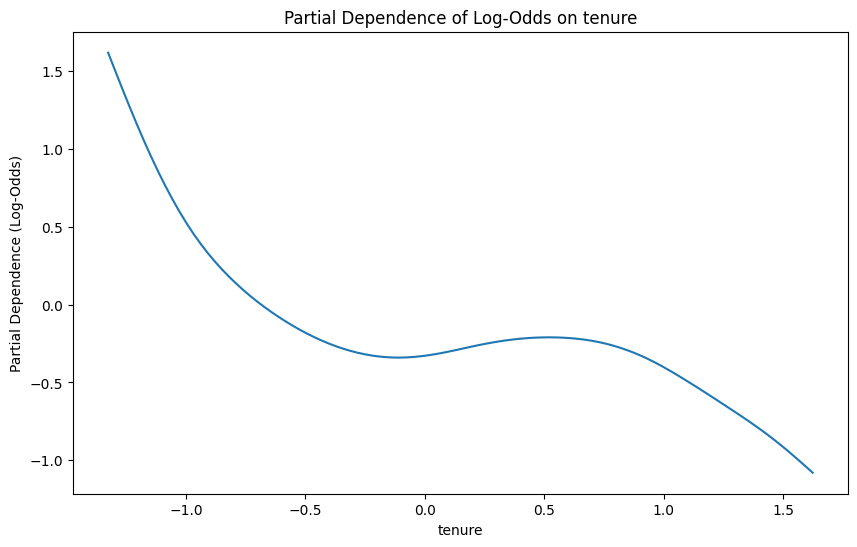

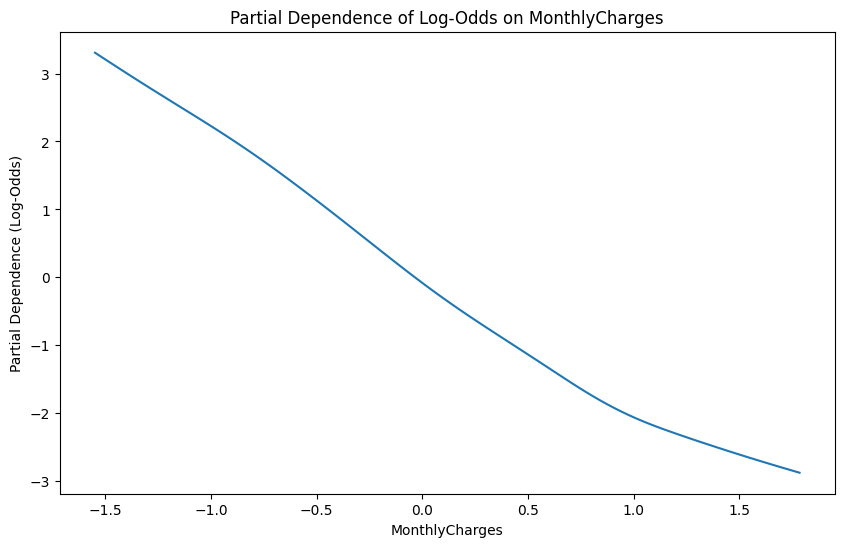

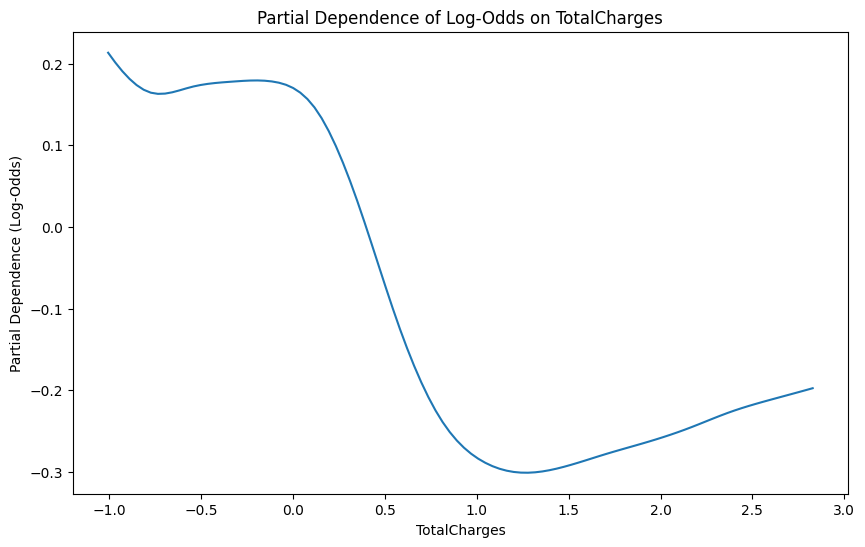

In [41]:
# Identify numerical columns (those modeled with splines)
numerical_col_names = X_train_encoded.select_dtypes(include=np.number).columns.tolist()

# Plot the partial dependence of the log-odds on each numerical feature
for i, col in enumerate(numerical_col_names):
    plt.figure(figsize=(10, 6))
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    #The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025
    plt.title(f'Partial Dependence of Log-Odds on {col}')
    plt.xlabel(col)
    plt.ylabel('Partial Dependence (Log-Odds)')
    plt.show()

### (GAMs) Residual Analysis

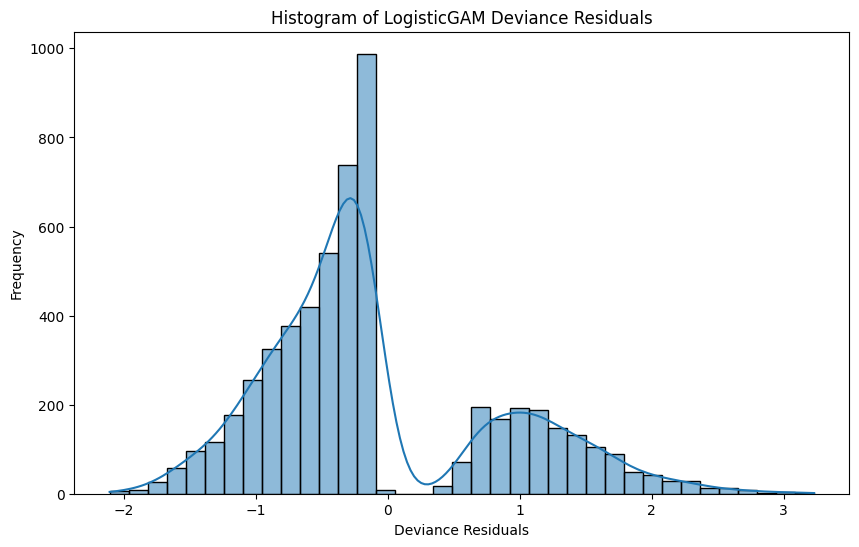

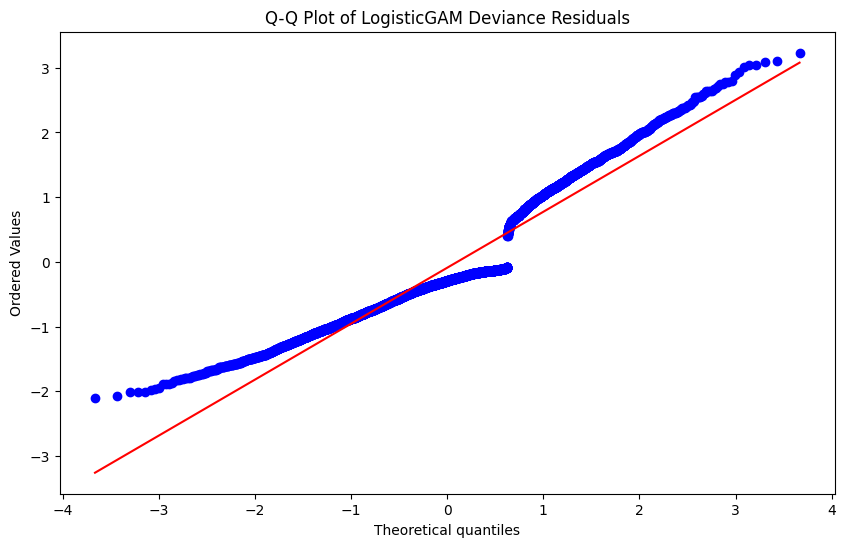

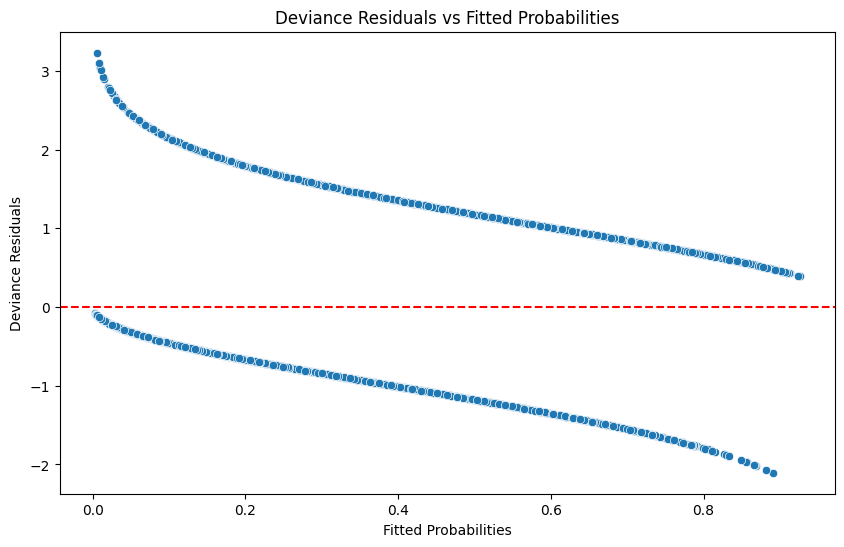

In [42]:
# Calculate residuals for the LogisticGAM on the training data
gam_residuals = gam.deviance_residuals(X_train_scaled, Y_train_numeric)
#The above code snippet was generated using the Gemini AI agent in Google Colab on 9/14/2025

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(gam_residuals, kde=True)
plt.title('Histogram of LogisticGAM Deviance Residuals')
plt.xlabel('Deviance Residuals')
plt.ylabel('Frequency')
plt.show()

# Create Q-Q plot of residuals
plt.figure(figsize=(10, 6))
stats.probplot(gam_residuals, dist="norm", plot=plt) # Using normal distribution as a reference for Q-Q plot
plt.title('Q-Q Plot of LogisticGAM Deviance Residuals')
plt.show()

# Get fitted values (predicted probabilities)
gam_fitted_probabilities = gam.predict_proba(X_train_scaled)

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gam_fitted_probabilities, y=gam_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Probabilities')
plt.ylabel('Deviance Residuals')
plt.title('Deviance Residuals vs Fitted Probabilities')
plt.show()

### Interpretation of LogisticGAM Results

#### 1. Partial Dependence (Feature Effects)
- **SeniorCitizen**: Nearly linear, positive relationship with churn. Senior citizens are slightly more likely to churn, though the effect is modest.  
- **Tenure**: Strong non-linear effect. Customers with short tenure are far more likely to churn, while long-tenured customers show much lower churn risk, stabilizing over time.  
- **MonthlyCharges**: Strong negative slope on log-odds; higher monthly charges are associated with greater churn likelihood.  
- **TotalCharges**: Non-linear relationship. Very low charges (new customers) are linked to higher churn, moderate charges reduce churn risk, and very high charges show stable or slightly increased risk.

#### 2. Residual Analysis
- **Histogram of Deviance Residuals**: Residuals are skewed and not centered at zero, indicating imperfect fit.  
- **Q-Q Plot**: Deviations from the diagonal line show non-normal residuals (expected in logistic regression but important to note).  
- **Residuals vs Fitted**: U-shaped pattern suggests unmodeled non-linearities or interactions remain.

####  Key Insights
- LogisticGAM effectively captures non-linear churn dynamics.  
- **Tenure** and **MonthlyCharges** are the most influential predictors.  
- Model fits well overall, but recall for churners is moderate, suggesting room for improvement (e.g., feature engineering, class balancing, or interaction terms).


###Comparison

**Performance Comparison:**

*   **Linear Regression:** Evaluated using MSE and R-squared on the test set. The MSE is 0.1341 and the R-squared is 0.3111. R-squared indicates that only a small proportion of the variance in churn can be explained by the linear model.
*   **Logistic Regression:** Evaluated using Accuracy, AUC, and the Classification Report on the test set. The Accuracy is 0.8197 and the AUC is 0.8616. The classification report provides precision, recall, and F1-score for each class.
*   **Generalized Additive Model (GAM):** Evaluated using Accuracy, AUC, and the Classification Report on the test set. The Accuracy is 0.8091 and the AUC is 0.8618. The classification report provides precision, recall, and F1-score for each class.

Based on the evaluation metrics for this binary classification problem, the Logistic Regression and GAM models perform significantly better than the Linear Regression model. Linear Regression is not appropriate for a binary outcome and its performance metrics confirm this. The Logistic Regression and GAM have similar performance in terms of Accuracy and AUC, with the Logistic Regression having slightly higher accuracy and the GAM having a slightly higher AUC in this instance.

**Interpretability Comparison:**

*   **Linear Regression:** Coefficients represent the estimated change in the mean of the dependent variable for a one-unit increase in the independent variable, assuming a linear relationship. However, interpreting these coefficients for a binary outcome (0 or 1) as a continuous change is not meaningful. The model's violation of assumptions also makes interpretation less reliable.
*   **Logistic Regression:** Coefficients represent the change in the log-odds of the outcome for a one-unit increase in the independent variable. Exponentiating the coefficients gives the odds ratio, which is more interpretable as the multiplicative change in the odds of the outcome. The interpretability assumes a linear relationship between predictors and the log-odds.
*   **Generalized Additive Model (GAM):** Offers a balance between interpretability and flexibility. Linear terms have the same interpretation as in logistic regression. Spline terms allow for visualizing and understanding potentially non-linear relationships between individual features and the log-odds of the outcome through partial dependence plots. This allows for a more nuanced understanding of feature effects compared to the strict linearity assumed by logistic regression.

In terms of interpretability, Logistic Regression provides straightforward linear interpretations on the log-odds scale. GAMs offer more complex but potentially more accurate interpretations by visualizing non-linear effects, which aligns better with potential non-linear relationships in the data (as suggested by the GAM partial dependence plots). Linear Regression's interpretability is limited and inappropriate for this binary classification task.

## Recommendations

Here are the recommendations for the telecommunications company based on the analysis of customer churn using Linear Regression, Logistic Regression, and Generalized Additive Models (GAM):

### 1. Linear Regression

**Strengths:**

*   Simple to implement and interpret.
*   Provides continuous probability-like outputs.

**Weaknesses:**

*   Not appropriate for binary classification since it doesn’t constrain predictions to \[0,1].
*   Assumptions such as normality and homoscedasticity are violated in a churn classification context.
*   Metrics (MSE = 0.1341, R² = 0.3111) confirm poor explanatory power.

**Verdict:** Not suited for customer churn prediction.

### 2. Logistic Regression

**Strengths:**

*   Specifically designed for binary classification.
*   Achieved strong performance (Accuracy = 0.8197, AUC = 0.8616).
*   Coefficients are interpretable in terms of log-odds and odds ratios, which is valuable for explaining the effect of customer attributes (e.g., contract type, tenure) on churn likelihood.
*   Computationally efficient, scalable, and relatively robust once multicollinearity is addressed.

**Weaknesses:**

*   Assumes linear relationships between predictors and log-odds, which may oversimplify customer behaviors.
*   Cannot naturally capture complex non-linear effects without manual feature engineering or transformations.

**Verdict:** A strong baseline and practical choice for churn modeling, especially where interpretability is key.I would recommend it

### 3. Generalized Additive Model (GAM)

**Strengths:**

*   Achieved comparable predictive performance to logistic regression (Accuracy = 0.8091, AUC = 0.8618).
*   Capable of modeling non-linear relationships between predictors and churn probability, as seen in the spline-based partial dependence plots.
*   Retains a degree of interpretability—managers can visualize how each predictor’s shape influences churn risk.

**Weaknesses:**

*   More complex to fit and explain compared to logistic regression.
*   May be computationally more expensive at scale.
*   Interpretability, while present, is less straightforward than logistic regression’s odds ratios.

**Verdict:** A good option when capturing non-linear customer behaviors is important. In our case, it gave similar results to the Logistic regression so wouldn't recommend it as the first or primary model.

### Recommendations

For the telecommunications company:

*   **Adopt Logistic Regression as the primary churn model.**
    *   It balances strong predictive performance with interpretability, making it suitable for operational decision-making and stakeholder communication.
    *   The company can use coefficients to identify the strongest drivers of churn (e.g., contract type, monthly charges) and design targeted retention strategies.
*   **Complement with GAM for deeper insights.**
    *   GAM can be used as a secondary model to uncover non-linear patterns that logistic regression may miss (e.g., churn risk sharply increasing after a certain tenure).
    *   Insights from GAM’s spline plots can guide feature engineering or segment-specific retention campaigns.
*   **Avoid Linear Regression for this task.**
    *   It violates key assumptions and underperforms, making it inappropriate for churn classification.

**Final Note:** A dual approach, using Logistic Regression for deployment and GAM for exploratory insight, would provide both operational effectiveness and strategic customer understanding.